# Probability Distribution Functions -
(1) Probability Density (PDF),
(2) Probability Masss Function (PMF)
(3) Cumulative Density Function (CDF)

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math


# Experiment 1: Rolling of one dice



In [24]:
# generate random data
# roll the dice n times and save the outcome of dice
outcome = []
n = 10000
for i in range(10000):
  outcome.append(random.randint(1,6))

outcome_df = pd.DataFrame(outcome, columns=['outcome'])
outcome_df.head()


,outcome
0,5
1,4
2,3
3,1
4,3


In [4]:
# get the probabilities of each outcome
# for given value find its number of occuracnes and divide by total sample space
outcome_df.describe()

,outcome
count,10000.000000
mean,3.474900
std,1.717692
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [5]:
# save the prob in dataframe
prob = pd.DataFrame(outcome_df.value_counts())
# type(prob)

In [6]:
outcome_df.shape

(10000, 1)

In [7]:
prob['probability'] = prob['count']/ outcome_df.shape[0]
prob = prob.reset_index()

prob

,outcome,count,probability
0,1,1717,0.1717
1,2,1711,0.1711
2,6,1668,0.1668
3,3,1652,0.1652
4,5,1638,0.1638
5,4,1614,0.1614


In [8]:
# sort dataframe by col value
prob =prob.sort_values(by = ["outcome"])
prob

,outcome,count,probability
0,1,1717,0.1717
1,2,1711,0.1711
3,3,1652,0.1652
5,4,1614,0.1614
4,5,1638,0.1638
2,6,1668,0.1668


## Probability Mass Function for rolling of one dice

In [9]:
prob.columns

Index(['outcome', 'count', 'probability'], dtype='object')

Text(0, 0.5, 'Probability for each outcome')

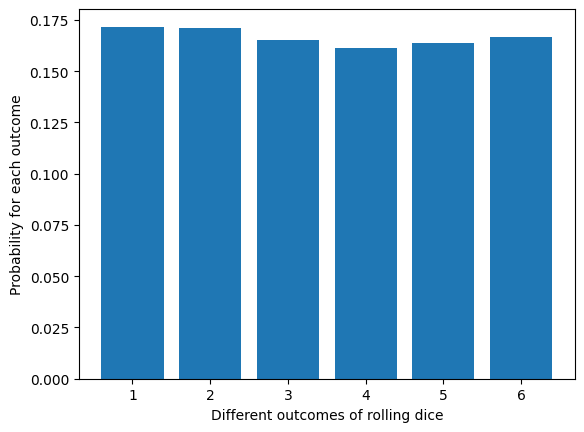

In [10]:
plt.bar(prob['outcome'], prob['probability'])
plt.xlabel('Different outcomes of rolling dice')
plt.ylabel('Probability for each outcome')

Observation: the Probability is almost same for all the outcomes.
Such distrubtion are called uniform distribution

# Experiment 2: Rolling of two dice  

In [18]:
# generate sample data for each dice
n = 10000
outcome_sum = []
for i in range(n):
  dice_1 = (random.randint(1,6))
  dice_2 = (random.randint(1,6))
  outcome_sum.append(dice_1 + dice_2)

In [19]:
# convert list to pandas dataframe
df_outcome = pd.DataFrame(outcome_sum, columns = ['outcome_sum'])


In [20]:
# df_outcome

In [21]:
# count unqiue sum
df_prob = pd.DataFrame(df_outcome.value_counts())
df_prob['prob'] = df_prob['count']/df_outcome.shape[0]

df_prob = df_prob.sort_values(by = ['outcome_sum'])
df_prob = df_prob.reset_index()
df_prob

,outcome_sum,count,prob
0,2,267,0.0267
1,3,586,0.0586
2,4,840,0.0840
3,5,1127,0.1127
4,6,1316,0.1316
5,7,1662,0.1662
6,8,1415,0.1415
7,9,1086,0.1086
8,10,855,0.0855
9,11,549,0.0549


In [22]:
df_prob

,outcome_sum,count,prob
0,2,267,0.0267
1,3,586,0.0586
2,4,840,0.0840
3,5,1127,0.1127
4,6,1316,0.1316
5,7,1662,0.1662
6,8,1415,0.1415
7,9,1086,0.1086
8,10,855,0.0855
9,11,549,0.0549


## Probability mass function for rolling dice two times and adding their outcomes

Text(0, 0.5, 'Probability for each outcome')

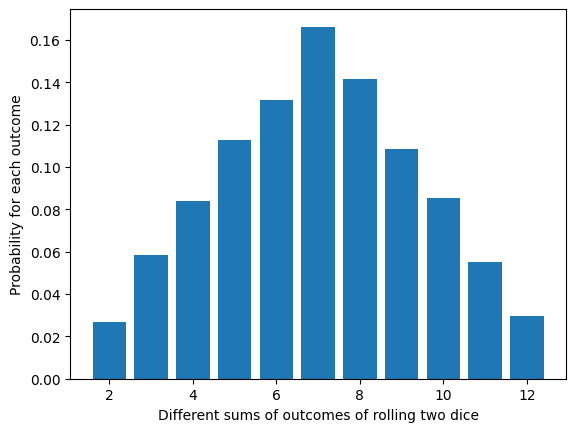

In [23]:
plt.bar(df_prob['outcome_sum'], df_prob['prob'])
plt.xlabel('Different sums of outcomes of rolling two dice')
plt.ylabel('Probability for each outcome')

Observtion: Rolling of 2 dice and adding the outcome obatined gives NORMAL DISTRIBUTION.
Note: difference of outcomes also gives Normal distribution.




# Parametric Density Estimation

In [31]:
# generate data from normal distribution
from numpy.random import normal

In [67]:
# the population parameters are: mean = 50 and std = 5
sample_data = normal(loc = 50, scale = 5, size = 1000) # loc is mean and scale is standard deviation
print(sample_data.mean())
sample_data.std()
# the sample mean and std are not exactly equal to population's.
# there are way to get close

50.05372983203072


4.905521918441998

Text(0, 0.5, 'frequency of data points in bin')

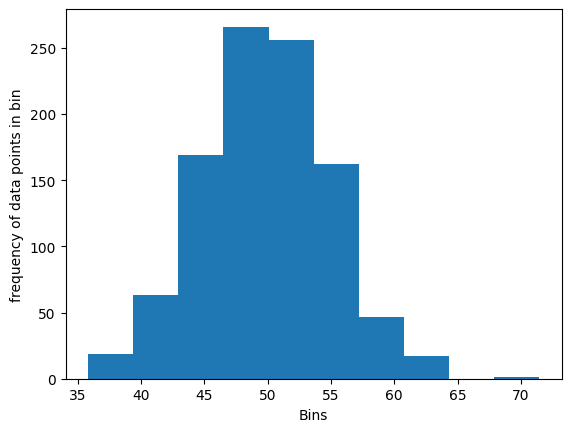

In [43]:
# plot the histrogram
# with the change in the number of bins the shape of distribution will change.
# For 0 bins no insight colud be deuced,
# If the number of bins is too high then each bin might have few data points
# So need to find the optimal number of bins, there are methods to do so such as Scott’s Rule, or the Square Root Rule.
plt.hist(sample_data, bins =10)
plt.xlabel("Bins")  # the range is based on the min and max value of the data points.
plt.ylabel("frequency of data points in bin")


In [44]:
# calculate the sample mean and std
sample_mean = sample_data.mean()
sample_std = sample_data.std()

In [68]:
# fit the normal distribution's pdf with above sample parameters
def pdf_fit(sample_mean, sample_std, x):
  denominator = np.sqrt(2 * np.pi * pow(sample_std,2))
  part_1 = 1/(denominator)
  exp_power = -1 *(pow((x-sample_mean),2)/(2 * pow(sample_std, 2)))
  part_2 = np.exp(exp_power)
  probability_density = part_1 * part_2
  return probability_density



In [57]:
# generate new data points in the range of min and max values
new_data = np.linspace(sample_data.min(), sample_data.max(), 100) # generate 100 evenly spaced data points

In [64]:
# caculate the probability density of above data points generated
probability_density = [pdf_fit(sample_mean, sample_std, v) for v in new_data]

Text(0.5, 1.0, 'Probability Density Funciton (PDF)')

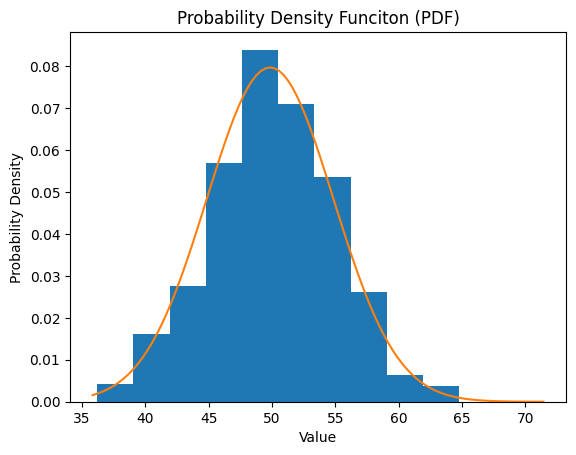

In [102]:
# the density should be True, if not the histogram shows frequency and
# if it True it shows the probability density
plt.hist(sample_data, bins=10, density = True)
plt.plot(new_data, probability_density)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Funciton (PDF)')

Observation: for the given range of sample data we got the probability distributions. There are variations in the plot, this is becasue the mean and std are not close to population mean and std

# Kernel Density Estimate

In [90]:
# generate data:
sample_1 = normal(loc =20, scale =5, size = 300)
sample_2 = normal(loc = 40, scale = 5, size = 700)
sample = np.concatenate((sample_1, sample_2))

In [91]:
len(sample)

1000

Text(0, 0.5, 'Frequency')

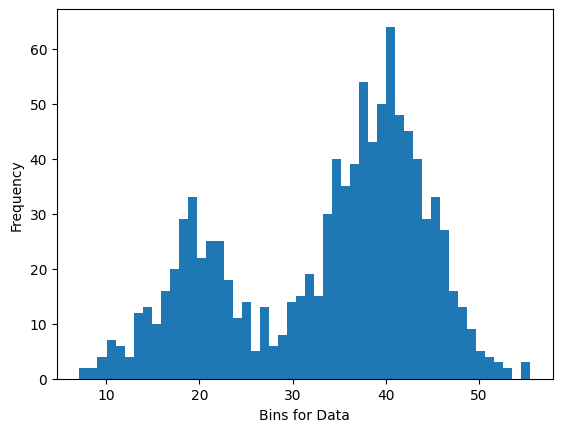

In [105]:
# plot histogram
plt.hist(sample, bins = 50)
plt.xlabel("Bins for Data")
plt.ylabel("Frequency")

In [95]:
# generate the pdf for the above distribution
# since the distribution is not known, we will use KDE
# code gaussian kernel, x is the number
def gaussian_kernel(x):
  part_1 = 1/(np.sqrt(2* np.pi))
  exp_power = -1 *( 1/2) * pow(x,2)
  exp_part = np.exp(exp_power)
  return part_1 * exp_part


In [97]:
# define kde for one data point
# Step1: generate the gaussian kernel for each data point using mean as that data point.
# Step2: add the kernel values
def kde(x, bandwidth, data):
    density = 0
    # for one data point density is calculated as
    for xi in data:
      # For x calculate the scaled distance (u) from each other data point.
      # This bandwidth is std and u is mean.
      u = (x-xi)/bandwidth
      # for xi data point get the kernel_value
      kernel_value = gaussian_kernel(u)
      # add the contribution of xi data point to density of x
      density += kernel_value
    n = len(data)
    density = density/(n* bandwidth)
    return density


Scaling by Bandwidth u = (x-xi)/h:

Dividing by h scales this distance.
A larger h makes u smaller, even for points that are relatively far from each other. This allows distant points to still have some influence.
A smaller h keeps u larger for those same points, making them contribute less to x's density. This means only points very close to x have a strong influence. In essence, bandwidth controls the spread of influence each data point has across the range of values.

Using u in the Kernel:

The calculated u tells the kernel function how much weight to give each data point’s contribution to the density at x.
If u is close to 0 (when x≈xi), the kernel function gives a high value, meaning a strong influence on the density.
If u is large (when x is far from xi), the kernel function gives a low value, meaning a small influence on the density.

Dividing by Bandwidth h:

The bandwidth h affects the spread of each data point’s influence.
By dividing by h, we adjust for how wide or narrow the kernel “bumps” are, ensuring that the density value accurately reflects the spread of data points around x.


In [99]:
# Range for the KDE evaluation
bandwidth =1
values = np.linspace(min(sample), max(sample), 100)
kde_values = [kde(x, bandwidth, sample) for x in values]


Text(0.5, 1.0, 'Kernel Density Estimate (KDE)')

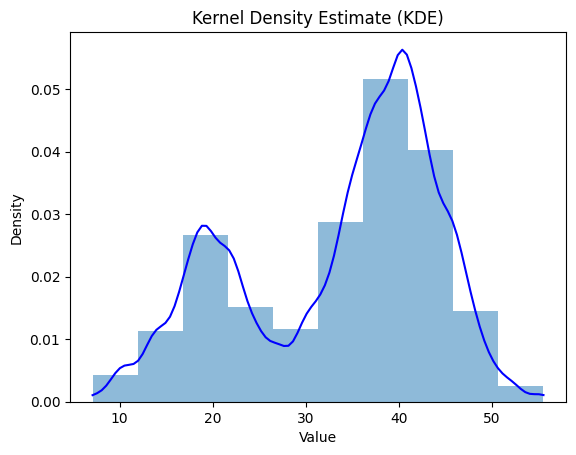

In [101]:
# plot KDE for new data and histogram of samples
plt.plot(values, kde_values, label='KDE', color='blue')
plt.hist(sample, bins=10, density=True, alpha=0.5, label='Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE)')

# Bernoulli Distribution
All the experiments whose outcome is binary follow bernoulli distribution.
For example: tossing of coin, rolling a dice and gettting a 5, spam and not spam filter.

It is discrete distribution it will have PMF

In [2]:
# PMF for bernoulli distribution
def pmf_bernoulli(x, p): # p is probability of success and x is the value for which we want to find probability
  pmf = pow(p,x) * pow((1-p),(1-x))
  return pmf


In [17]:
# for coin toss
def pmf_coin_toss():
  pmf_success = pmf_bernoulli(1, 1/2)
  pmf_fail = pmf_bernoulli(0, 1/2)
  return [pmf_success,pmf_fail]

# random experiment
def pmf_identify_spam():
  pmf_success = pmf_bernoulli(1, .8)
  pmf_fail = pmf_bernoulli(0, .2)
  return [pmf_success,pmf_fail]



0.5 0.5


<BarContainer object of 2 artists>

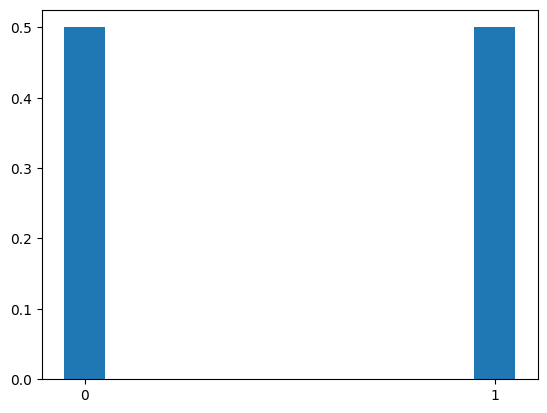

In [21]:
pmf_success,pmf_fail = pmf_coin_toss()

categories = ['0', '1']
values = [pmf_fail, pmf_success]

print(pmf_success,pmf_fail)
plt.bar(categories,values, width=.1)



<BarContainer object of 2 artists>

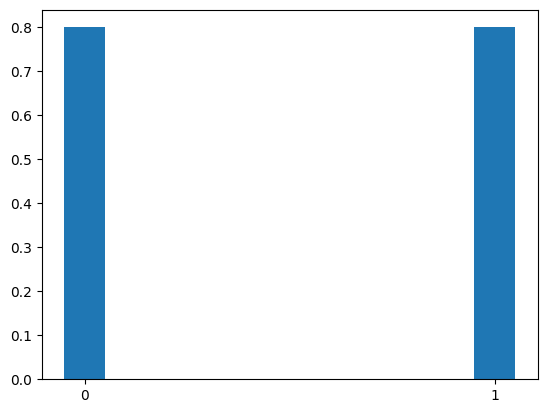

In [22]:
pmf_success,pmf_fail = pmf_identify_spam()
categories = ['0', '1']
values = [pmf_fail, pmf_success]
plt.bar(categories,values, width=.1)

# Binomial Distribution
Number of success in the bernoulli experiment conducted n times, independently.
For examples tossing a coin 5 times, checking if 10 emails are spam or not spam.


In [57]:
def binomial_probability(n,x, p):
  #  Calculate the probability of getting exactly x successes in n trials
   #  for a binomial distribution with success probability p.
  probability = math.comb(n, x) * pow(p,x) * pow((1-p), (n-x))
  return probability

def binomial_distribution():
  num_times_exp_done = 1000
  num_trials_in_one_exp = 10
  probability_of_success  = 0.5
  results = []
  for _ in range(num_times_exp_done):
    successes = np.random.binomial(num_trials_in_one_exp, probability_of_success)
    # result store the number of success in given trial
    results.append(successes)

  # count the number of times a given number of success is observed
  outcome_counts = Counter(results)


  # find the probability of each outcome by dividing the count of each outcome by num_times_exp_done
  empirical_probabilities = []
  for k in range(num_trials_in_one_exp + 1):  # Include all possible outcomes from 0 to num_trials
      empirical_probabilities.append(outcome_counts.get(k, 0) / num_times_exp_done) # outcome_counts.get(k, 0) 0 ensure if k not there 0

  # Calculate the exact theoretical probability for each possible number of successes k (from 0 to num_trials_in_one_exp), based on the binomial formula
  exact_probabilities = []
  for k in range(num_trials_in_one_exp+1):
    prob = binomial_probability(num_trials_in_one_exp, k, probability_of_success)
    exact_probabilities.append(prob)

  plt.figure(figsize=(10, 6))
  plt.bar(range(num_trials_in_one_exp + 1), empirical_probabilities, color='skyblue', alpha=0.7, label='Empirical')
  plt.plot(range(num_trials_in_one_exp + 1), exact_probabilities, marker='o', color='red', label='Exact')
  plt.xlabel('Number of Successes')
  plt.ylabel('Probability')
  # plt.title(f'Simulated Binomial Distribution (n={num_trials_in_one_exp}, p={p})')
  plt.legend()
  plt.show()



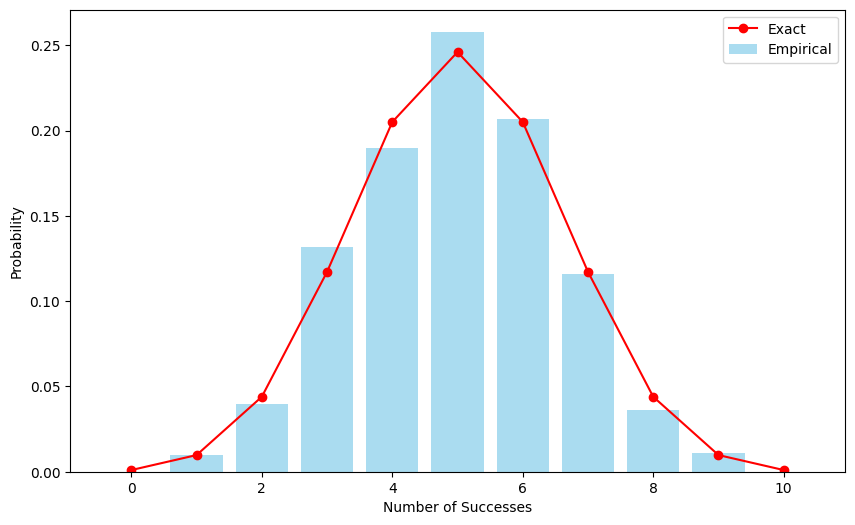

In [58]:
binomial_distribution()

Using both **exact** and **empirical** probabilities help us to compare the **theoretical** (exact) distribution with the **observed** (empirical) outcomes from simulations. This comparison shows how well the observed data aligns with theoretical expectations, which helps verify the accuracy of the model and understand any potential discrepancies due to random variation.

In [60]:
## Binomial distribution in ML:
from scipy.stats import binom

# Parameters
n = 10  # Number of trials (e.g., 10 predictions)
p = 0.8  # Probability of success (e.g., 80% chance of correct prediction)

# Probability of getting exactly 7 successes out of 10
k = 7
probability = binom.pmf(k, n, p)
print(f"Probability of exactly {k} successes out of {n}: {probability:.4f}")

# Probability of getting 7 or more successes out of 10
probability_7_or_more = binom.sf(k-1, n, p)
print(f"Probability of 7 or more successes out of {n}: {probability_7_or_more:.4f}")


Probability of exactly 7 successes out of 10: 0.2013
Probability of 7 or more successes out of 10: 0.8791



The binomial distribution is widely used in machine learning, particularly when modeling binary events or outcomes that can either succeed or fail. For example:

1. Binary Classification Evaluation:
In binary classification tasks, the outcome can either be positive (1) or negative (0), the binomial distribution models the probability of a certain number of positive outcomes.
For example, in logistic regression, we predict the probability of an instance belonging to a particular class (e.g., spam vs. not spam).
The model outputs a probability that can be interpreted as a binomial process.

2. Modeling Success/Failure Events in Classification
In some applications, it’s important to model the number of successful classifications over multiple attempts, where each attempt is a Bernoulli trial (success or failure).
For instance, if we are tracking whether a machine learning model correctly classifies instances over multiple trials, the binomial distribution can model the probability of making 𝑘 correct classifications out of 𝑛 attempts.

3. Confidence Intervals for Binary Class Predictions
When predicting a binary outcome, the binomial distribution helps in calculating confidence intervals around predictions.
For example, if a model predicts a class with 90% accuracy in a test set of 100 instances, the binomial distribution allows us to construct a confidence interval around this accuracy level.

4. Estimating Probabilities in A/B Testing
In A/B testing, often used in machine learning to compare models or algorithms, the binomial distribution is used to test for a statistically significant difference in performance.
Suppose we’re comparing two models and observing the number of successful predictions from each. We can apply a binomial test to see if the observed differences are statistically significant.

5. Predictive Modeling of Rare Events
For tasks that involve rare events (such as predicting fraud), the binomial distribution is useful to understand and model the likelihood of these events over time.
For example, predicting the number of fraudulent transactions out of a batch of 1,000 can use a binomial approach to calculate the probability of seeing a certain number of frauds based on historical rates.

6. Loss Functions for Binary Outcomes
The binomial distribution can help define loss functions when modeling binary outcomes. For instance, cross-entropy loss in classification problems has its roots in the log-likelihood of the binomial distribution.
This loss function measures how well the probability predictions align with the actual outcomes (0 or 1) and is critical in optimizing models like logistic regression and neural networks.

# Poisson Distribution

The Poisson distribution is used in ML to model and predict the occurrence of rare events over a specific time period or spatial area, especially when these events happen independently and with a constant average rate. Here are some key its applications:

1. Modeling Count-Based Data
Poisson regression, a type of generalized linear model, is commonly used to predict count data — where the outcome is a count of occurrences.
For example, predicting the number of website visits per hour, the number of purchases made by a customer, or the number of accidents at an intersection.

2. Predicting Rare Events
The Poisson distribution is ideal for modeling rare events. For instance, predicting:
The number of times a user clicks on an ad in a day.
The number of fraud cases in a financial transaction dataset.
The number of equipment failures in a factory over a month.
Each of these events is relatively rare, but understanding the rate and likelihood of these occurrences can help with resource planning, anomaly detection, and risk assessment.

3. Customer Lifetime Value (CLV) Prediction
The Poisson distribution can be applied to forecast how often a customer will make purchases over time, helping to estimate Customer Lifetime Value (CLV).
By understanding the average frequency of purchases, businesses can predict revenue from customers based on their shopping habits.

4. Natural Language Processing (NLP)
In NLP, the Poisson distribution is sometimes used to model the frequency of specific words or phrases in documents.
For example, it can help in identifying frequently occurring keywords in documents to improve topic modeling, summarization, and keyword extraction.

5. Anomaly Detection
The Poisson distribution can be used to detect anomalies in time series data or event-based data, where we want to flag unusual increases in event counts.
For example, if a cybersecurity model detects login attempts for a system, a sharp increase in the number of attempts (compared to the usual Poisson-distributed pattern) might indicate a security breach.


# Normal distribution

# Uniform Distribution

# Exponential Distribution

# Gamma Distribution